<a href="https://colab.research.google.com/github/Subhranshu-123/BIKE2/blob/main/Copy_of_hypothesis_dr_vinod_reddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.stats import ttest_ind

# Sample data: Blood pressure reduction
group1 = [8, 9, 7, 10, 6]  # New drug
group2 = [5, 6, 5, 7, 4]   # Existing drug

# Perform a two-sample t-test
stat, p_value = ttest_ind(group1, group2)

# Results
print(f"T-Statistic: {stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The new drug is more effective.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-Statistic: 2.9824045403173027
P-Value: 0.01753595231952982
Reject the null hypothesis: The new drug is more effective.


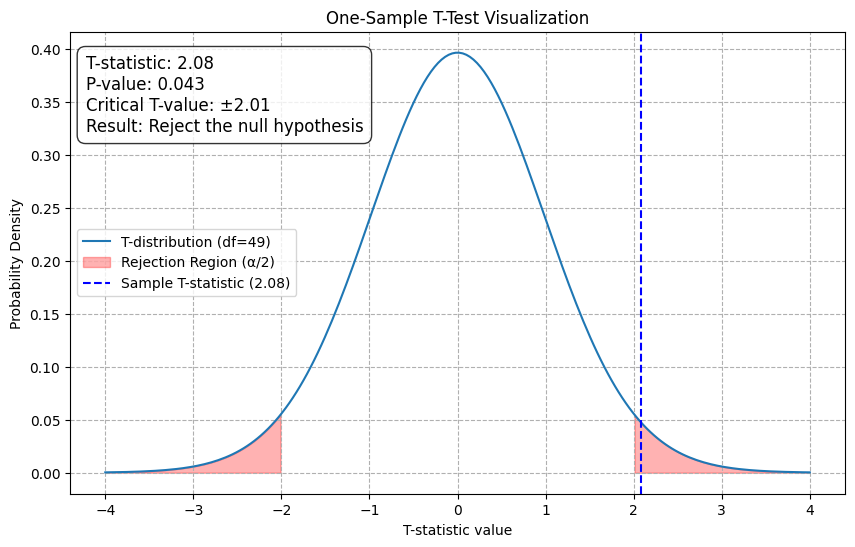

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# --- 1. Define the scenario and parameters ---
# Assume a known population mean (mu) for blood pressure
population_mean_bp = 120
sample_size = 50
np.random.seed(42) # For reproducibility
# Create a sample of blood pressure readings
# The sample mean is set to be slightly higher than the population mean
sample_bp = np.random.normal(loc=125, scale=10, size=sample_size)

# Perform the one-sample t-test
t_statistic, p_value = stats.ttest_1samp(sample_bp, popmean=population_mean_bp)
alpha = 0.05

# --- 2. Calculate values for visualization ---
# Degrees of freedom for a one-sample test is n-1
degrees_of_freedom = sample_size - 1

# Calculate critical t-value for a two-tailed test
critical_t = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)

# Generate x-values for the t-distribution plot
x = np.linspace(-4, 4, 200)
# Calculate the probability density function (PDF) for the t-distribution
pdf = stats.t.pdf(x, degrees_of_freedom)

# --- 3. Create the plot with matplotlib ---
plt.figure(figsize=(10, 6))
# Plot the t-distribution curve
plt.plot(x, pdf, label=f'T-distribution (df={degrees_of_freedom})')

# Shade the critical regions (two-tailed test)
# Shade left tail
x_left_tail = np.linspace(-4, -critical_t, 100)
plt.fill_between(x_left_tail, 0, stats.t.pdf(x_left_tail, degrees_of_freedom), color='red', alpha=0.3, label='Rejection Region (α/2)')
# Shade right tail
x_right_tail = np.linspace(critical_t, 4, 100)
plt.fill_between(x_right_tail, 0, stats.t.pdf(x_right_tail, degrees_of_freedom), color='red', alpha=0.3)

# Plot a vertical line for the sample's t-statistic
plt.axvline(x=t_statistic, color='blue', linestyle='--', label=f'Sample T-statistic ({t_statistic:.2f})')

# Add text to the plot with the test results
text_result = f"T-statistic: {t_statistic:.2f}\nP-value: {p_value:.3f}\nCritical T-value: ±{critical_t:.2f}\n"
if p_value < alpha:
    text_result += "Result: Reject the null hypothesis"
else:
    text_result += "Result: Fail to reject the null hypothesis"
plt.text(0.02, 0.95, text_result, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))

# Add plot labels and title
plt.title('One-Sample T-Test Visualization')
plt.xlabel('T-statistic value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()


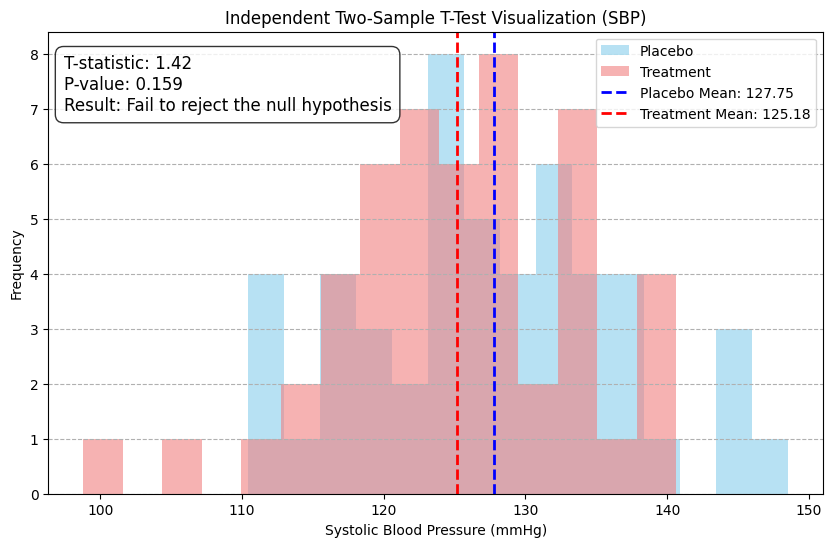

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# --- 1. Define the scenario and generate data ---
np.random.seed(42)  # For reproducibility

# Assume a placebo group with a mean SBP of 130
placebo = np.random.normal(loc=130, scale=10, size=50)

# Assume a treatment group with a slightly lower mean SBP of 125
treatment = np.random.normal(loc=125, scale=10, size=50)

# Perform the independent two-sample t-test
# `equal_var=False` performs Welch's t-test, which does not assume equal population variances
t_statistic, p_value = stats.ttest_ind(placebo, treatment, equal_var=False)
alpha = 0.05

# --- 2. Create the plot with matplotlib ---
plt.figure(figsize=(10, 6))
plt.hist(placebo, bins=15, alpha=0.6, color='skyblue', label='Placebo')
plt.hist(treatment, bins=15, alpha=0.6, color='lightcoral', label='Treatment')

# Add vertical lines for the group means
plt.axvline(np.mean(placebo), color='blue', linestyle='dashed', linewidth=2, label=f'Placebo Mean: {np.mean(placebo):.2f}')
plt.axvline(np.mean(treatment), color='red', linestyle='dashed', linewidth=2, label=f'Treatment Mean: {np.mean(treatment):.2f}')

# Add text box for test results
text_result = f"T-statistic: {t_statistic:.2f}\nP-value: {p_value:.3f}\n"
if p_value < alpha:
    text_result += "Result: Reject the null hypothesis"
else:
    text_result += "Result: Fail to reject the null hypothesis"

plt.text(0.02, 0.95, text_result, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8))

# Add plot labels and title
plt.title('Independent Two-Sample T-Test Visualization (SBP)')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()
